In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
FLOWER_DAISY_DIR='/content/drive/My Drive/DS_ML_Files/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/My Drive/DS_ML_Files/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/My Drive/DS_ML_Files/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/My Drive/DS_ML_Files/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/My Drive/DS_ML_Files/flowers/rose'

In [ ]:
X=[]
Z=[]
IMG_SIZE=150

In [ ]:
def assign_label(img,flower_type):
    return flower_type
  

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))


100%|██████████| 773/773 [00:03<00:00, 230.13it/s]

773


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:03<00:00, 203.66it/s]

1507


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:04<00:00, 223.46it/s]

2491


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

 99%|█████████▉| 1048/1059 [00:04<00:00, 225.28it/s]


error: ignored

In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 787/787 [00:03<00:00, 230.72it/s]

4333


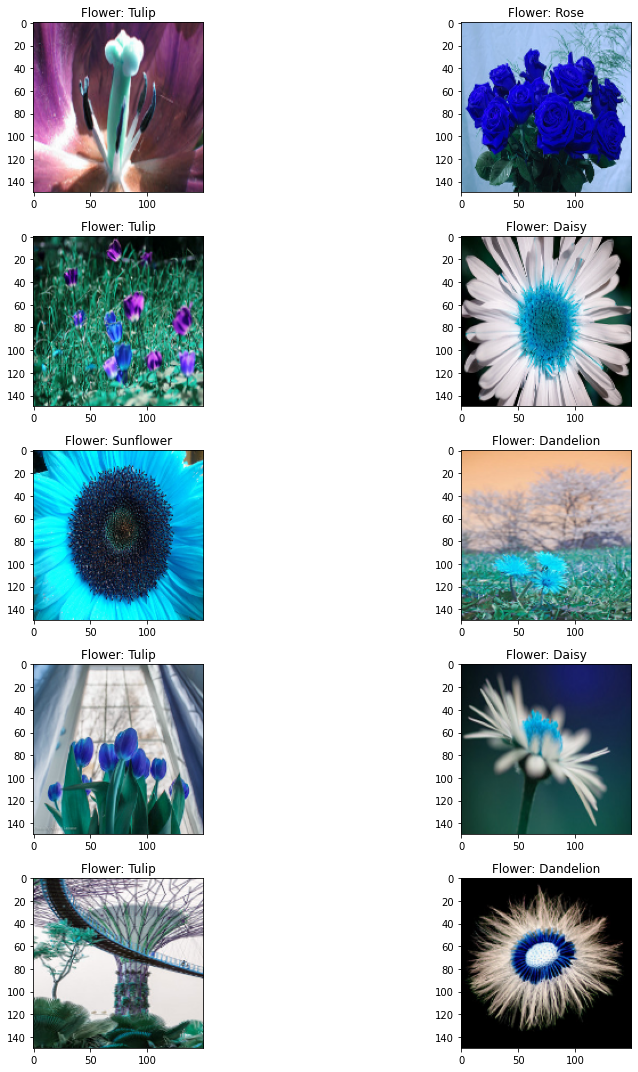

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
Y1=le.fit_transform(Z)
print(Y1)
print(Y1.shape)

[0 0 0 ... 2 2 2]
(4333,)


In [ ]:
Y[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(X.shape)
print(Y.shape)

(4333, 150, 150, 3)
(4333, 5)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(f'Shape of the training data: {x_train.shape}')
print(f'Shape of the training target: {y_train.shape}')
print(f'Shape of the test data: {x_test.shape}')
print(f'Shape of the test target: {y_test.shape}')


Shape of the training data: (3249, 150, 150, 3)
Shape of the training target: (3249, 5)
Shape of the test data: (1084, 150, 150, 3)
Shape of the test target: (1084, 5)


In [ ]:
vgg_model=VGG16(include_top=False, weights=None,input_shape=(150,150,3), pooling='avg') 

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Adding our Own Fully Connected Layers

In [ ]:
model=Sequential()
model.add(vgg_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

Data Augmentation to prevent Overfitting

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)



In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
epochs=15
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 14,847,301
Non-trainable params: 0
_________________________________________________________________


**Compiling & Training the Model**

While using transfer learning in ConvNet; we have basically have 3 main approaches-->

1) To use the pretrained model as a feature extractor and just train your classifier on top of it. In this method we do not tune any weights of the model.

2) Fine Tuning- In this approach we tune the weights of the pretrained model. This can be done by unfreezing the layers that we want to train.In that case these layers will be initialised with their trained weights on imagenet.

3) Lasty we can use a pretrained model.

Note that in this section I have used the first approach ie I have just use the conv layers and added my own fully connected layers on top of VGG model. Thus I have trained a classifier on top of the CNN codes.


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=15
batch_size=128
History1 = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                    epochs = 15, validation_data = (x_test,y_test),
                    verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/15
25/25 [==============================] - 58s 2s/step - loss: 1.6033 - accuracy: 0.2359 - val_loss: 1.4758 - val_accuracy: 0.3459
Epoch 2/15
25/25 [==============================] - 24s 952ms/step - loss: 1.4296 - accuracy: 0.3773 - val_loss: 1.3542 - val_accuracy: 0.3662
Epoch 3/15
25/25 [==============================] - 25s 977ms/step - loss: 1.3287 - accuracy: 0.4178 - val_loss: 1.4740 - val_accuracy: 0.3330
Epoch 4/15
25/25 [==============================] - 25s 983ms/step - loss: 1.3075 - accuracy: 0.4175 - val_loss: 1.3113 - val_accuracy: 0.3958
Epoch 5/15
25/25 [==============================] - 24s 963ms/step - loss: 1.2538 - accuracy: 0.4391 - val_loss: 1.2860 - val_accuracy: 0.3967
Epoch 6/15
25/25 [==============================] - 24s 960ms/step - loss: 1.2460 - accuracy: 0.4353 - val_loss: 1.2293 - val_accuracy: 0.4585
Epoch 7/15
25/25 [==============================] - 25s 968ms/step - loss: 1.1786 - accuracy: 0.5020 - val_loss: 1.1369 - val_accuracy: 0.5277
Ep

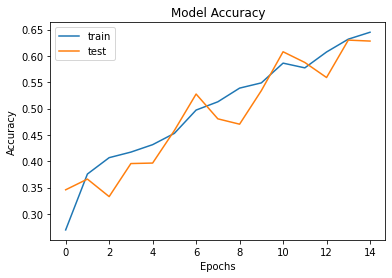

In [ ]:
plt.plot(History1.history['accuracy'])
plt.plot(History1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

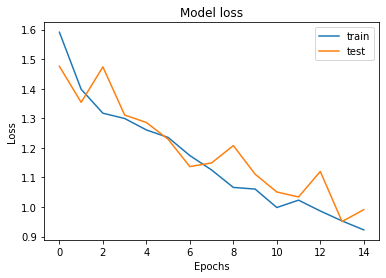

In [ ]:
plt.plot(History1.history['loss'])
plt.plot(History1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

FINE TUNING BY UNFREEZING THE LAST BLOCK OF VGG16

In [ ]:
for i in range (len(vgg_model.layers)):
    print (i,vgg_model.layers[i])
  
for layer in vgg_model.layers[15:]:
    layer.trainable=True
for layer in vgg_model.layers[0:15]:
    layer.trainable=False

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1905f0c110>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f19053918d0>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18fd192610>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f18fac69fd0>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18fac83190>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18fac82110>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f18fac88c50>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18fac548d0>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18fac88f10>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18f9c0c950>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f18f9c138d0>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f18fac85910>
12 <tensorflow.python.ke

In [ ]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History2 = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                    epochs = 15, validation_data = (x_test,y_test),
                    verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)


Epoch 1/15
25/25 [==============================] - 20s 769ms/step - loss: 0.8867 - accuracy: 0.6520 - val_loss: 0.9122 - val_accuracy: 0.6559
Epoch 2/15
25/25 [==============================] - 19s 746ms/step - loss: 0.8399 - accuracy: 0.6623 - val_loss: 0.9256 - val_accuracy: 0.6384
Epoch 3/15
25/25 [==============================] - 18s 735ms/step - loss: 0.8445 - accuracy: 0.6780 - val_loss: 0.8924 - val_accuracy: 0.6402
Epoch 4/15
25/25 [==============================] - 18s 731ms/step - loss: 0.8161 - accuracy: 0.6981 - val_loss: 0.8934 - val_accuracy: 0.6494
Epoch 5/15
25/25 [==============================] - 19s 750ms/step - loss: 0.8206 - accuracy: 0.6739 - val_loss: 0.8833 - val_accuracy: 0.6550
Epoch 6/15
25/25 [==============================] - 19s 741ms/step - loss: 0.8464 - accuracy: 0.6675 - val_loss: 0.9076 - val_accuracy: 0.6522
Epoch 7/15
25/25 [==============================] - 19s 750ms/step - loss: 0.8370 - accuracy: 0.6800 - val_loss: 0.9075 - val_accuracy: 0.6375

In [ ]:
print(History2.history)

{'loss': [0.8666089177131653, 0.8514842391014099, 0.8433014750480652, 0.8311203718185425, 0.8312680125236511, 0.8460773825645447, 0.8188934922218323, 0.826044499874115, 0.8140957951545715, 0.8131272792816162, 0.8181648254394531, 0.8143011331558228, 0.7969032526016235, 0.8158223628997803, 0.8078561425209045], 'accuracy': [0.6594040393829346, 0.6628124713897705, 0.6712592244148254, 0.6853572726249695, 0.6712499856948853, 0.6741428971290588, 0.6847164630889893, 0.6773470044136047, 0.6843960285186768, 0.6754245162010193, 0.6895225644111633, 0.6847164630889893, 0.6927266716957092, 0.6811919212341309, 0.6847164630889893], 'val_loss': [0.9122158288955688, 0.9255571365356445, 0.8923590779304504, 0.8933970928192139, 0.883294939994812, 0.9076098799705505, 0.9075138568878174, 0.8979924321174622, 0.8724403381347656, 0.8711901903152466, 0.8877069354057312, 0.8864659667015076, 0.8714321255683899, 0.8845322728157043, 0.8466299772262573], 'val_accuracy': [0.6559040546417236, 0.6383763551712036, 0.6402

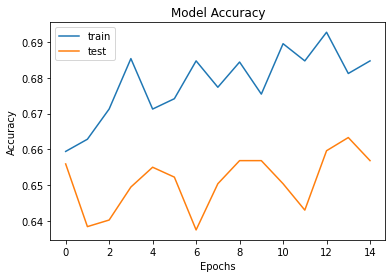

In [ ]:
plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

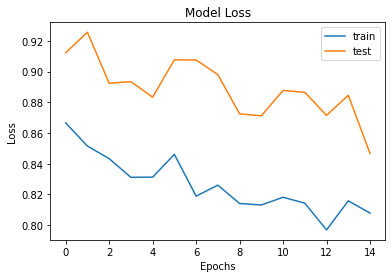

In [ ]:
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

 UNFREEZING THE LAST 2 BLOCKS

In [ ]:
# for i in range (len(vgg_model.layers)):
#     print (i,vgg_model.layers[i])
  
# for layer in vgg_model.layers[11:]:
#     layer.trainable=True
# for layer in vgg_model.layers[0:11]:
#     layer.trainable=False

In [ ]:
# model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# History3 = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
#                     epochs = 20, validation_data = (x_test,y_test),
#                     verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

In [ ]:
# plt.plot(History3.history['accuracy'])
# plt.plot(History3.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epochs')
# plt.legend(['train', 'test'])
# plt.show()

In [ ]:
# plt.plot(History3.history['loss'])
# plt.plot(History3.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend(['train', 'test'])
# plt.show()

TRAINING THE ENTIRE MODEL FROM SCRATCH

In [ ]:
model=Sequential()
model.add(vgg_model)

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5,activation='softmax'))


for layer in vgg_model.layers:
    layer.trainable=True

model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History4 = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                    epochs = 10, validation_data = (x_test,y_test),
                    verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
25/25 [==============================] - 26s 1s/step - loss: 1.1111 - accuracy: 0.5669 - val_loss: 1.1462 - val_accuracy: 0.5766
Epoch 2/10
25/25 [==============================] - 25s 1s/step - loss: 0.8802 - accuracy: 0.6704 - val_loss: 1.0642 - val_accuracy: 0.6144
Epoch 3/10
25/25 [==============================] - 25s 986ms/step - loss: 0.8245 - accuracy: 0.6857 - val_loss: 0.9996 - val_accuracy: 0.6190
Epoch 4/10
25/25 [==============================] - 25s 984ms/step - loss: 0.8082 - accuracy: 0.6963 - val_loss: 0.9598 - val_accuracy: 0.6993
Epoch 5/10
25/25 [==============================] - 25s 975ms/step - loss: 0.7670 - accuracy: 0.7076 - val_loss: 0.9597 - val_accuracy: 0.6430
Epoch 6/10
25/25 [==============================] - 25s 975ms/step - loss: 0.7034 - accuracy: 0.7380 - val_loss: 0.9037 - val_accuracy: 0.6753
Epoch 7/10
25/25 [==============================] - 25s 969ms/step - loss: 0.7423 - accuracy: 0.7274 - val_loss: 0.8373 - val_accuracy: 0.6937
Epoch

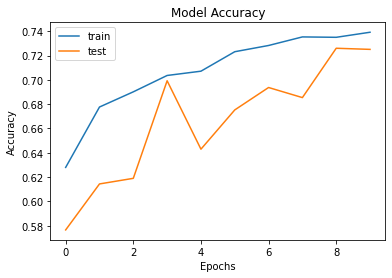

In [ ]:
plt.plot(History4.history['accuracy'])
plt.plot(History4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

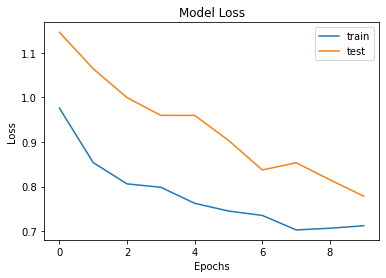

In [ ]:
plt.plot(History4.history['loss'])
plt.plot(History4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)
print(pred)
print(pred_digits)

[[0.01070399 0.00140163 0.02713711 0.00887182 0.9518854 ]
 [0.03219572 0.09129462 0.00382952 0.86124843 0.01143167]
 [0.11767561 0.60337067 0.17852132 0.05336122 0.04707124]
 ...
 [0.9607117  0.01338838 0.00648858 0.00637802 0.01303322]
 [0.19833095 0.18751906 0.37798738 0.03944788 0.19671476]
 [0.09814154 0.02801718 0.49514207 0.02614684 0.35255235]]
[4 3 1 ... 0 2 2]


In [ ]:
print(y_test.shape)
print(y_test[0])


(1084, 5)
[0. 0. 0. 0. 1.]


In [ ]:
print(x_test.shape)

(1084, 150, 150, 3)


In [ ]:
# y_pred = model.predict(x_test)
# test_img = x_test.reshape(x_test.shape[0], 150, 150)
# print(test_img.shape)

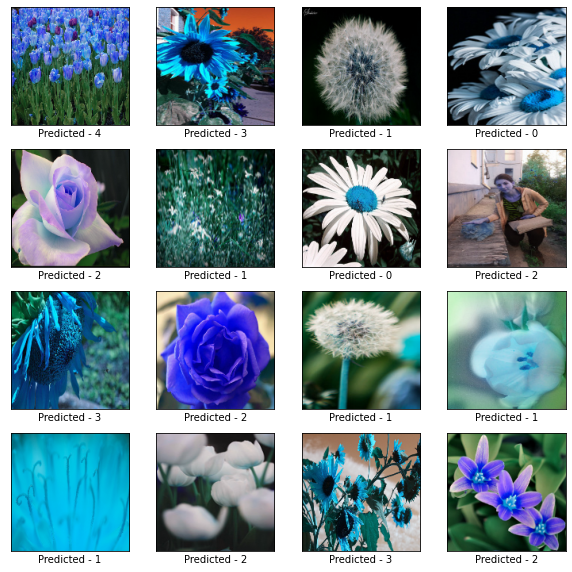

In [ ]:
# y_pred = model.predict(x_test)
# test_img = x_test.reshape(x_test.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted - {y_pred[i].argmax()}')
plt.show()